### SNA (Social Network Analysis)
 
 - 네트워크 및 그래프 이론을 사용, 사회구조를 분석하는 머신러닝 한 분야 
 - 노드(node) 와 연결선(link / edge) 으로 구성
 - 선의 두께로 관계의 강도를 나타냄 
 - 소셜 네트워크 분석의 특성 
   - 활동 분야가 매우 다양 
   - 다른 머신러닝, 딥러닝 알고리즘과 결합 사용 
   - 노드와 연결선의 속성 지정 가능 
   - 연결선을 방향성과 비방향성이 있음 
   - 네트워크 설명하기 위해 여러 지수를 정의, 활용   

### 네트워크 분석을 위한 지수의 정의
 
 - Degree : Node 가 갖는 연결선의 수 
 - node 입장에서 들어오는 선을 입선(indegree), 나가는 선을 출선(outdegree)라 부름(방향선 그래프일 경우)
 
 - Density(밀도)= (모든 노드의 입선수(출선수)의 합) / (가능한 연결선의 모든 경우의 수) 
   - 즉, 노드에 연결되는 선이 많을 수록 밀도가 높아짐 
   
- 도달가능도 : 노드 쌍에 대하여 한 노드에서 다른 노드로 도달 가능한지 여부를 0또는 1로 나타낸 값
  - from ~ to  : 존재하면 1, 없으면 0

- component : 내부적으로 상호 도달 가능한 노드들의 그룹 
  - 네트워크에서 component 가 적을 수록 좁은 세상이 됨 
  
- 중심성(centrality) 
  - 근접 중심성 (closeness centraility)
    - 해당 노드와 다른 모든 노드와의 평균 최단거리를 구한 다음 역수를 취한 값 
    - 평균 최단거리가 가장 작을수록 네트워크 중심에 위치 
    
  - 중개 중심성 (betweeness centraility)
    - 네트워크에서 허브역할을 얼마나 잘하는 지 
      정보의 통로나 전달 역할을 얼마나 잘하는지에 대한 지수 
    - i > v > j 로 정보가 흘러간다고 할 때, 
      정보가 i에서 j로 흐를 때, v의 비중이 얼마나 되는지에 대한 지수 
      
  - 아이겐벡터 중심성(eigen vector centrality)
    - 연결된 노드에 따라 가중치를 부여함
      중요한 노드에 연결된 노드에 더 많은 중요성(가중치) 부여 
      예) 중요하고 인기 있는 1인에게 투표를 받은 여성 vs. 인지도 없는 3인에게 투표를 받은 여성
    - 페이지 랭크와 유사

In [36]:
import re
import networkx as nx # 의미연결망 라이브러리 

In [37]:
import pandas as pd
df = pd.read_csv('./smartphone.csv', encoding='utf-8')
galaxy_posts = df.get('Title') + " " + df.get('Description')
galaxy_post_date = df.get('Post Date')

In [38]:
df

,Title,Link,Description,Blogger Name,Blogger Link,Post Date,Post Contents
0,ZEM 초등학생 스마트폰 관리앱으로 걱정 덜어요,https://blog.naver.com/rladbrud8791?Redirect=L...,사실 제가 최근까지도 고민하고 있었던 부분이 바로 아이의 스마트폰 필요성 때문인데요...,갱이랑 정이랑♡,https://blog.naver.com/rladbrud8791,20220226,\n\n\n\n\n\n\n리뷰\n\n\n\n\nZEM 초등학생 스마트폰 관리앱으로 ...
1,아이폰 SE3 사전예약 출시일 가격 정보! 애플의 보급형 스마트폰,https://blog.naver.com/hongganz?Redirect=Log&l...,애플의 보급형 스마트폰 아이폰 SE3 가 출시한다. 보통 대부분의 스마트폰들은 급나...,이웃삼촌이 들려주는 IT 이야기,https://blog.naver.com/hongganz,20220313,\n\n\n\n\n\n\n\n\n\n출시 정보\n\n\n\n\n아이폰 SE3 사전예...
2,왜 다들 스마트폰 삼각대 추천 하는지 궁금해서 써본 후기,https://blog.naver.com/tnwpqla?Redirect=Log&lo...,하다가 스마트폰 삼각대 를 구매를 해야겠단 생각을 해서 제대로 된 것을 알아보려고 ...,초컬렛::대학생 블로그,https://blog.naver.com/tnwpqla,20220310,\n\n\n\n\n\n\n협찬+포스팅알바\n\n\n\n\n왜 다들 스마트폰 삼각대 ...
3,스마트폰 백업 필요하다면 네이버 마이박스(MY BOX)로!,https://blog.naver.com/dogslife78?Redirect=Log...,최근 컴퓨터나 노트북 뿐만 아니라 항상 소지하고 다니는 스마트폰이나 태블릿과 같은 ...,노숙페이스,https://blog.naver.com/dogslife78,20220301,"\n\n\n\n\n\n\n가전, 그리고 IT\n\n\n\n\n스마트폰 백업 필요하다..."
4,"맥갤럭시 스마트폰 연결, 백업",https://blog.naver.com/yhj5738?Redirect=Log&lo...,스마트폰에 스마트 스위치 앱이 설치되지 않을 경우에는 맥에서 Smaert Switc...,Dream girl's life,https://blog.naver.com/yhj5738,20220304,"\n\n\n\n\n\n\n관리방법\n\n\n\n\n맥갤럭시 스마트폰 연결, 백업 \..."
...,...,...,...,...,...,...,...
995,스마트폰이 떨어질 땐 휘어진다?,http://news.egloos.com/4161002,일본 후지쯔에서 만든 애로우즈 비-라는 스마트폰 브랜드가 있습니다. 떨어져도 잘 깨...,"자그니 블로그 : 거리로 나가자, 키스를 하자",http://news.egloos.com/,20181009,NaN
996,"부품 교체 및 업글 가능한 스마트폰, 페어폰 3 발매",http://news.egloos.com/4175365,모듈화된 스마트폰 프로젝트 '아라'를 진행한 적이 있습니다. 물론 제대로 된 시제품...,"자그니 블로그 : 거리로 나가자, 키스를 하자",http://news.egloos.com/,20190909,NaN
997,"MWC2018, 최고와 최악의 스마트폰은 무엇?",https://enjoiyourlife.com/2436?category=581147,상반기 스마트폰 시장에서 어떤 성과를 보여줄 것인지에 관심이 모아지고 있습니다. 특...,HOME,http://enjoiyourlife.com/,20180302,NaN
998,유튜브 동영상 보기 좋은 스마트폰 리스트 발표,https://photohistory.tistory.com/18077,DRM (디지털 저작권 관리)의 성능이 높은 폰 유튜브는 이 6가지 항목을 토대로 ...,사진은 권력이다,https://photohistory.tistory.com/,20180810,NaN


In [39]:
print(galaxy_posts)
print()
print(galaxy_post_date)

0      ZEM 초등학생 스마트폰 관리앱으로 걱정 덜어요 사실 제가 최근까지도 고민하고 있었...
1      아이폰 SE3 사전예약 출시일 가격 정보! 애플의 보급형 스마트폰 애플의 보급형 스...
2      왜 다들 스마트폰 삼각대 추천 하는지 궁금해서 써본 후기 하다가 스마트폰 삼각대 를...
3      스마트폰 백업 필요하다면 네이버 마이박스(MY BOX)로! 최근 컴퓨터나 노트북 뿐...
4      맥갤럭시 스마트폰 연결, 백업 스마트폰에 스마트 스위치 앱이 설치되지 않을 경우에는...
                             ...                        
995    스마트폰이 떨어질 땐 휘어진다? 일본 후지쯔에서 만든 애로우즈 비-라는 스마트폰 브...
996    부품 교체 및 업글 가능한 스마트폰, 페어폰 3 발매 모듈화된 스마트폰 프로젝트 '...
997    MWC2018, 최고와 최악의 스마트폰은 무엇? 상반기 스마트폰 시장에서 어떤 성과...
998    유튜브 동영상 보기 좋은 스마트폰 리스트 발표 DRM (디지털 저작권 관리)의 성능...
999    카카오 5G 스마트폰 ‘STAGE 5G’ 출시, 맘에 들지 않는다 카카오 인베스트먼...
Length: 1000, dtype: object

0      20220226
1      20220313
2      20220310
3      20220301
4      20220304
         ...   
995    20181009
996    20190909
997    20180302
998    20180810
999    20191104
Name: Post Date, Length: 1000, dtype: int64


In [40]:
from eunjeon import Mecab
tagger = Mecab()

# 불용어 처리 
galaxy_stop_words = "은 이 것 등 더 를 좀 즉 인 옹 때 만 원 이때 개 일 기 시 럭 갤 성 삼 스 폰 트 드 기 이 리 폴 사 전 마 자 플 블 가 중 북 수 팩 년 월 저 탭"
galaxy_stop_words = galaxy_stop_words.split(' ')
galaxy_stop_words[0:10]

['은', '이', '것', '등', '더', '를', '좀', '즉', '인', '옹']

In [41]:
# 명사 추출 
galaxy_nouns = []
for post in galaxy_posts:            
    for noun in tagger.nouns(post):
        if noun not in galaxy_stop_words:
            galaxy_nouns.append(noun)
            
galaxy_nouns[0:10]

['초등학생', '스마트폰', '관리', '앱', '걱정', '제', '최근', '고민', '부분', '아이']

In [42]:
from collections import Counter
num_top_nouns = 20
galaxy_nouns_counter = Counter(galaxy_nouns)
galaxy_top_nouns = dict(galaxy_nouns_counter.most_common(num_top_nouns))

In [43]:
galaxy_posts

0      ZEM 초등학생 스마트폰 관리앱으로 걱정 덜어요 사실 제가 최근까지도 고민하고 있었...
1      아이폰 SE3 사전예약 출시일 가격 정보! 애플의 보급형 스마트폰 애플의 보급형 스...
2      왜 다들 스마트폰 삼각대 추천 하는지 궁금해서 써본 후기 하다가 스마트폰 삼각대 를...
3      스마트폰 백업 필요하다면 네이버 마이박스(MY BOX)로! 최근 컴퓨터나 노트북 뿐...
4      맥갤럭시 스마트폰 연결, 백업 스마트폰에 스마트 스위치 앱이 설치되지 않을 경우에는...
                             ...                        
995    스마트폰이 떨어질 땐 휘어진다? 일본 후지쯔에서 만든 애로우즈 비-라는 스마트폰 브...
996    부품 교체 및 업글 가능한 스마트폰, 페어폰 3 발매 모듈화된 스마트폰 프로젝트 '...
997    MWC2018, 최고와 최악의 스마트폰은 무엇? 상반기 스마트폰 시장에서 어떤 성과...
998    유튜브 동영상 보기 좋은 스마트폰 리스트 발표 DRM (디지털 저작권 관리)의 성능...
999    카카오 5G 스마트폰 ‘STAGE 5G’ 출시, 맘에 들지 않는다 카카오 인베스트먼...
Length: 1000, dtype: object

In [44]:
# 블로그 내용을 문장으로 나누기 위해 
# 문장 끝을 나타내는 ';' '.' '?' "!" 구분자 사용
galaxy_sentences = []
for post in galaxy_posts:
    galaxy_sentences.extend(re.split('; |\.|\?|\!', post))
    
galaxy_sentences[0:10]

['ZEM 초등학생 스마트폰 관리앱으로 걱정 덜어요 사실 제가 최근까지도 고민하고 있었던 부분이 바로 아이의 스마트폰 필요성 때문인데요',
 ' 처음 생각할',
 '',
 '',
 ' 아이패드 에어부터 JBL 어린이 블루투스 헤드셋, 포켓몬스터 마우스와 패드세트, 플라키키 물병 폰 가방',
 '',
 '',
 ' ',
 '아이폰 SE3 사전예약 출시일 가격 정보',
 ' 애플의 보급형 스마트폰 애플의 보급형 스마트폰 아이폰 SE3 가 출시한다']

In [45]:
# 블로그 내용을 문장별로 구분, 구분된 문장 별로 명사 추출 
galaxy_sentences_nouns = []
for sentence in galaxy_sentences:
    sentence_nouns = tagger.nouns(sentence)
    galaxy_sentences_nouns.append(sentence_nouns)

galaxy_sentences_nouns[0:10]

[['초등학생',
  '스마트폰',
  '관리',
  '앱',
  '걱정',
  '제',
  '최근',
  '고민',
  '부분',
  '아이',
  '스마트폰',
  '필요',
  '때문'],
 ['처음', '생각'],
 [],
 [],
 ['아이패드',
  '에어',
  '어린이',
  '블루투스',
  '헤드셋',
  '포켓몬스터',
  '마우스',
  '패드',
  '세트',
  '플라키',
  '키',
  '물병',
  '폰',
  '가방'],
 [],
 [],
 [],
 ['아이폰', '사전', '예약', '출시', '일', '가격', '정보'],
 ['애플', '보급', '스마트폰', '애플', '보급', '스마트폰', '아이폰', '출시']]

In [46]:
# 상위 단어인 top_nouns에 대해 
# key에 해당되는 단어, value에 해당하는 id를 넣어 
# dict()형태로 word2id 변수에 담기
galaxy_word2id = {w: i for i, w in enumerate(galaxy_top_nouns.keys())}
galaxy_word2id

{'스마트폰': 0,
 '강의': 1,
 '사진': 2,
 '사용': 3,
 '갤럭시': 4,
 '카메라': 5,
 '동영상': 6,
 '앱': 7,
 '제작': 8,
 '유튜브': 9,
 '삼성': 10,
 '반응': 11,
 '스마트': 12,
 '활용': 13,
 '촬영': 14,
 '방법': 15,
 '안드로이드': 16,
 '화면': 17,
 '강': 18,
 '영상': 19}

In [47]:
# 상위 단어인 top_nouns에 대해 
# key에 해당되는 id, value에 해당하는 단어를 넣어 
# dict()형태로 id2word 변수에 담기

galaxy_id2word = {i: w for i, w in enumerate(galaxy_top_nouns.keys())}
galaxy_id2word

{0: '스마트폰',
 1: '강의',
 2: '사진',
 3: '사용',
 4: '갤럭시',
 5: '카메라',
 6: '동영상',
 7: '앱',
 8: '제작',
 9: '유튜브',
 10: '삼성',
 11: '반응',
 12: '스마트',
 13: '활용',
 14: '촬영',
 15: '방법',
 16: '안드로이드',
 17: '화면',
 18: '강',
 19: '영상'}

In [48]:
import numpy as np

# 상위 단어들에 대한 인접행렬 생성 
galaxy_adjacent_matrix = np.zeros((num_top_nouns, num_top_nouns), int)
galaxy_adjacent_matrix

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

In [49]:
import numpy as np

# 상위 단어들에 대한 인접행렬 생성 
galaxy_adjacent_matrix = np.zeros((num_top_nouns, num_top_nouns), int)

# 문장 내 상위 단어가 함께 포함된 비중에 따른 가중치 계산 행렬에 표현
for sentence in galaxy_sentences_nouns:
    for wi, i in galaxy_word2id.items(): #word2id : 인접해렬 생성하기 위해 
        if wi in sentence:
            for wj, j in galaxy_word2id.items():
                if i != j and wj in sentence:
                    galaxy_adjacent_matrix[i][j] += 1
                    
galaxy_adjacent_matrix
# 행렬에서 가중치가 0 이상이면 서로 연결 

array([[  0, 121, 207, 238, 180, 136, 135, 113, 125, 127, 134, 144, 104,
        135, 104, 141,  97,  79,  90,  64],
       [121,   0,  22,   0,   2,   1,  81,   1,  95,  83,   1,  63,   5,
         55,  17,   4,   0,   0,  90,  22],
       [207,  22,   0,  15,  17,  58,  15,   7,  11,   5,  14,  12,  16,
         28,  43,  10,   4,   0,   5,  16],
       [238,   0,  15,   0,  30,  18,   6,  28,   3,   1,  17,  13,  24,
         11,   4,  37,  27,   9,   0,   3],
       [180,   2,  17,  30,   0,  20,   7,  24,   0,   0,  82,  12,  19,
          5,   8,  45,   6,  12,   0,   3],
       [136,   1,  58,  18,  20,   0,   0,   0,   0,   0,  14,   3,   5,
          6,  14,   3,   0,   0,   0,   1],
       [135,  81,  15,   6,   7,   0,   0,  13,  88,  96,   4,  59,   5,
         49,  22,   3,   0,   4,  68,   5],
       [113,   1,   7,  28,  24,   0,  13,   0,   1,   1,  24,   6,  12,
          9,   0,  14,  10,   9,   0,   4],
       [125,  95,  11,   3,   0,   0,  88,   1,   0,  96,   0,  

In [50]:
# 인접행렬로 연결망 만들고, 연결망에 포함된 인접행렬 결과 확인 
galaxy_network = nx.from_numpy_matrix(galaxy_adjacent_matrix)
galaxy_network

In [51]:
list(galaxy_network.adjacency())

[(0,
  {1: {'weight': 121},
   2: {'weight': 207},
   3: {'weight': 238},
   4: {'weight': 180},
   5: {'weight': 136},
   6: {'weight': 135},
   7: {'weight': 113},
   8: {'weight': 125},
   9: {'weight': 127},
   10: {'weight': 134},
   11: {'weight': 144},
   12: {'weight': 104},
   13: {'weight': 135},
   14: {'weight': 104},
   15: {'weight': 141},
   16: {'weight': 97},
   17: {'weight': 79},
   18: {'weight': 90},
   19: {'weight': 64}}),
 (1,
  {0: {'weight': 121},
   2: {'weight': 22},
   4: {'weight': 2},
   5: {'weight': 1},
   6: {'weight': 81},
   7: {'weight': 1},
   8: {'weight': 95},
   9: {'weight': 83},
   10: {'weight': 1},
   11: {'weight': 63},
   12: {'weight': 5},
   13: {'weight': 55},
   14: {'weight': 17},
   15: {'weight': 4},
   18: {'weight': 90},
   19: {'weight': 22}}),
 (2,
  {0: {'weight': 207},
   1: {'weight': 22},
   3: {'weight': 15},
   4: {'weight': 17},
   5: {'weight': 58},
   6: {'weight': 15},
   7: {'weight': 7},
   8: {'weight': 11},
   9: {

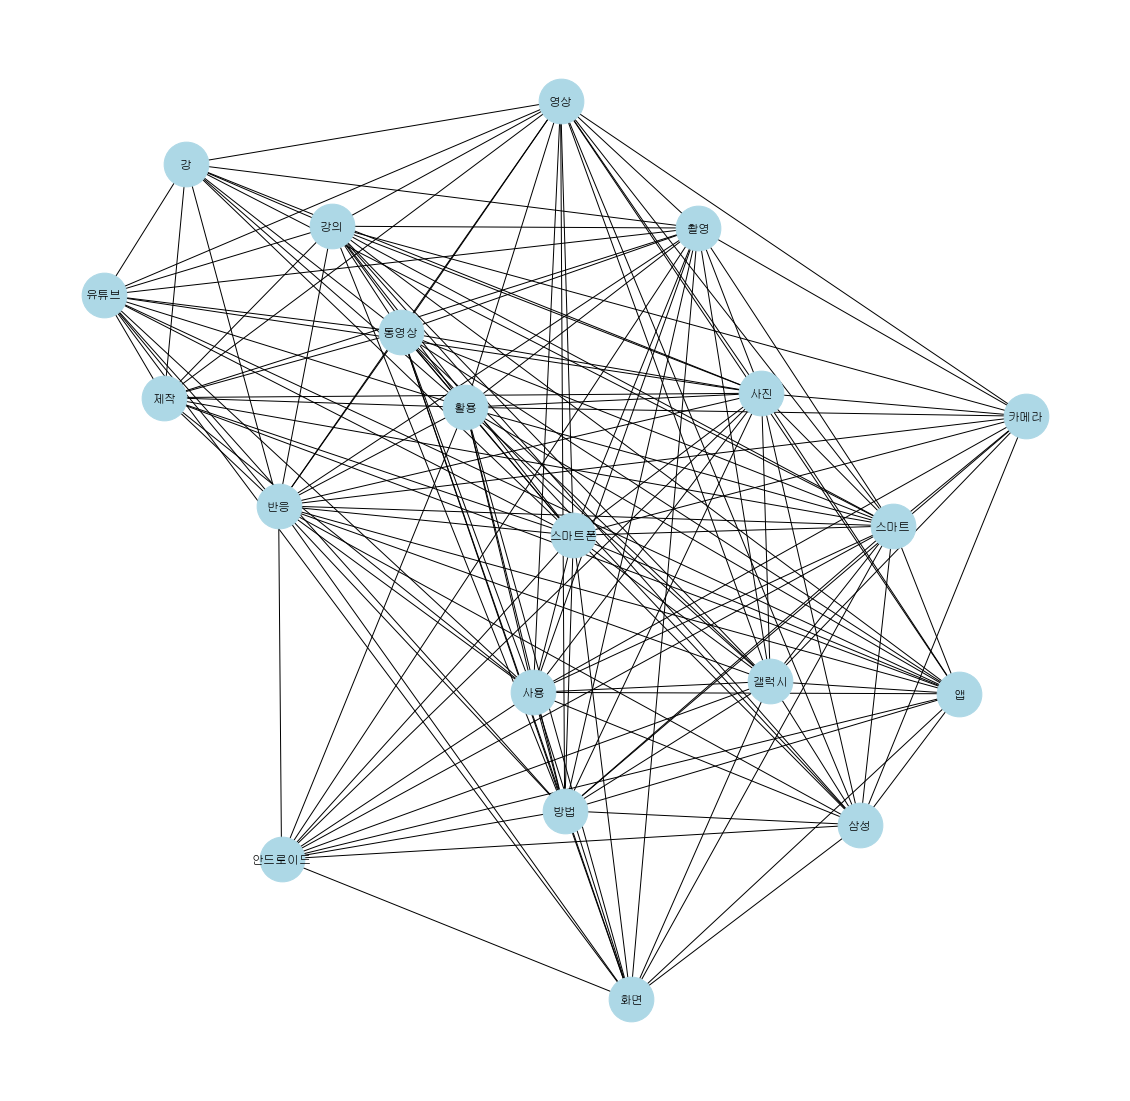

In [52]:
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm
from matplotlib import rc

font_path = 'C:\\Windows\\Fonts\\NGULIM.ttf'
font_name = fm.FontProperties(fname= font_path).get_name()
rc('font', family=font_name)

fig = plt.figure()
fig.set_size_inches(20, 20)
ax = fig.add_subplot(1, 1, 1)
ax.axis("off")

option = {
    'node_color': 'lightblue',
    'node_size': 2000}

nx.draw(galaxy_network, labels=galaxy_id2word, font_family=font_name, ax=ax, **option)  # networkx draw()
plt.draw()  # pyplot draw()


의미연결망 표현

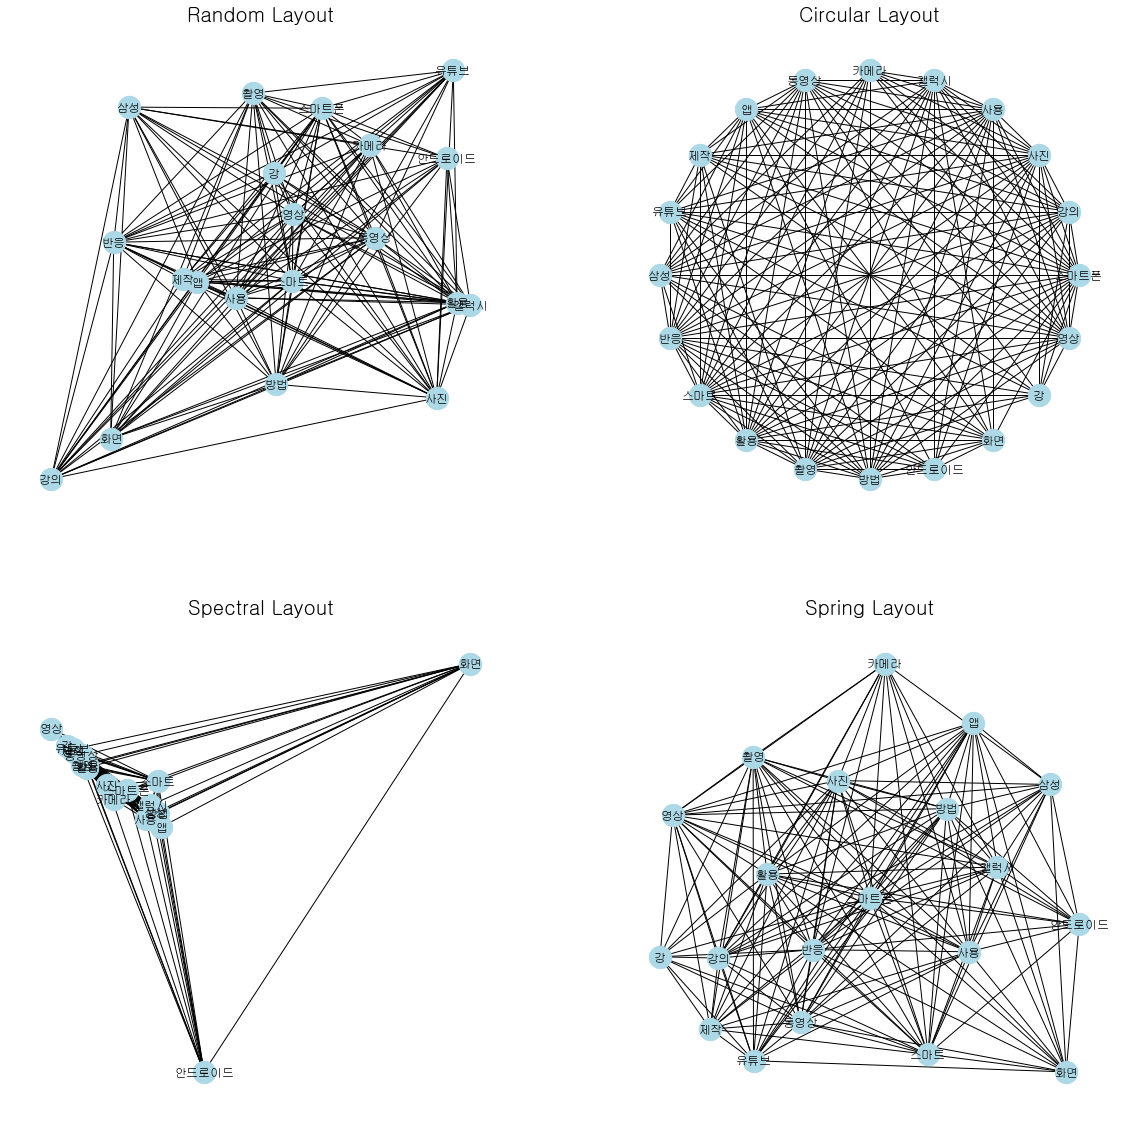

In [53]:
fig = plt.figure()
fig.set_size_inches(20, 20)
option = {
    'node_color' : 'lightblue',
    'node_size' : 500
}

# random layout
plt.subplot(221)#221: 2행2열의 1
plt.title('Random Layout', fontsize=20)
nx.draw_random(galaxy_network, labels=galaxy_id2word, font_family=font_name, **option)

# circular layout
plt.subplot(222)
plt.title('Circular Layout', fontsize=20)
nx.draw_circular(galaxy_network, labels=galaxy_id2word, font_family=font_name, **option)

# spectral layout
plt.subplot(223)
plt.title('Spectral Layout',fontsize=20)
nx.draw_spectral(galaxy_network, labels=galaxy_id2word, font_family=font_name, **option)

# spring layout 
plt.subplot(224)
plt.title('Spring Layout',fontsize=20)
nx.draw_spring(galaxy_network, labels=galaxy_id2word, font_family=font_name, **option)

#### 연결중심성 

- 가장 기본적인 중심성 측정 지표 
- 텍스트에서 한 단어에 직접 연결된 다른 단어의 수가 많으면 연결중심성이 높다
- 얼마나 많은 단어와 연결되어 있는가가 중요

In [54]:
# 연결 중심성 (degree centrality) 
nx.degree_centrality(galaxy_network)

{0: 1.0,
 1: 0.8421052631578947,
 2: 0.9473684210526315,
 3: 0.894736842105263,
 4: 0.8421052631578947,
 5: 0.631578947368421,
 6: 0.894736842105263,
 7: 0.8421052631578947,
 8: 0.6842105263157894,
 9: 0.7368421052631579,
 10: 0.7368421052631579,
 11: 1.0,
 12: 0.9473684210526315,
 13: 0.9473684210526315,
 14: 0.894736842105263,
 15: 0.894736842105263,
 16: 0.631578947368421,
 17: 0.6842105263157894,
 18: 0.5789473684210527,
 19: 0.894736842105263}

#### 위세중심성 

- 연결된 상대 단어의 중요성에 가중치 부여 
- 중요한 단어와 많이 연결될 수록 높아짐 
- 얼마나 중요한 단어와 연결되었는가가 중요

In [55]:
# 위세 중심성(Eigenvector cetrality)
nx.eigenvector_centrality(galaxy_network, weight='weight')

{0: 0.5909630951481912,
 1: 0.2426444033904608,
 2: 0.2228205152883786,
 3: 0.22901042654014295,
 4: 0.19618816051521798,
 5: 0.13919072463518772,
 6: 0.24818132646324012,
 7: 0.12276185215732052,
 8: 0.24257531970647642,
 9: 0.235042731771284,
 10: 0.14861608740722476,
 11: 0.22843463554020274,
 12: 0.11572436877370817,
 13: 0.20611206861151224,
 14: 0.1407813218541515,
 15: 0.15879076319553803,
 16: 0.0967157977836968,
 17: 0.07775941752505307,
 18: 0.20098951209038754,
 19: 0.10099904602606556}

#### 근접중심성 

- 한 단어가 다른 단어에 얼마나 가깝게 있는지 측정 
- 두 단어 사이 거리가 핵심
- 근접 중심성이 높을 수록 전체 연결망 중심적 위치에서 타 단어들과 가까이 위치해 있다고 해석

In [56]:
# 근접중심성(Closeness centrality)
nx.closeness_centrality(galaxy_network, distance='weight')

{0: 0.014626635873749037,
 1: 0.14074074074074075,
 2: 0.09405940594059406,
 3: 0.12666666666666668,
 4: 0.11515151515151516,
 5: 0.1357142857142857,
 6: 0.10857142857142857,
 7: 0.13970588235294118,
 8: 0.125,
 9: 0.13970588235294118,
 10: 0.1310344827586207,
 11: 0.12582781456953643,
 12: 0.10982658959537572,
 13: 0.10734463276836158,
 14: 0.12179487179487179,
 15: 0.11801242236024845,
 16: 0.10919540229885058,
 17: 0.13194444444444445,
 18: 0.07539682539682539,
 19: 0.1292517006802721}

#### 매개중심성 

- 한 단어가 다른 단어들과 연결망 구축하는 데 매개자 역할을 수행하는지 측정
- 잠재적 중개역할이 클수록 전체 연결망을 제어하는 힘도 크다고 해석

In [57]:
# 매개중심성(Current Flow Betweenness)
nx.current_flow_betweenness_centrality(galaxy_network)

{0: 0.07843518575255125,
 1: 0.0678356181233357,
 2: 0.07471218556619173,
 3: 0.07063168757429604,
 4: 0.06515203954667452,
 5: 0.049559057450887845,
 6: 0.06979506774521926,
 7: 0.06657435651401843,
 8: 0.0550573531564546,
 9: 0.06066119043975564,
 10: 0.06033192615095699,
 11: 0.07843518575255137,
 12: 0.07529072382373833,
 13: 0.07525368982223456,
 14: 0.07295425182928722,
 15: 0.06888259788704064,
 16: 0.05108413092882794,
 17: 0.05606666773596547,
 18: 0.04765837289136686,
 19: 0.06999260793783792}